# Pandas 라이브러리를 사용하여 파일을 불러오는 코드

## usecols를 사용하여 사용할 column만 추출하여 가져온다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Webtoon Dataset.csv', usecols=['Name','Likes','Genre']) # usecols를 사용하여 사용할 col만 불러 데이터 사용
df.drop(df[df['Genre'] == 'Slice of life'].index, inplace=True) # genre라는 키워드에서 Slice of life 라는 데이터는 제외시키겠다.


In [2]:
df = df.drop(df.index[-1]) # 맨마지막 데이터는 필요없는 데이터라 drop으로 index[-1] 맨마지막 데이터를 제외시키겠다는 코드

# 데이터를 그래프로 표현하려면 문자열 및 단위를 수로 치환하는 코드

In [3]:
# '30.6M' 이라는 데이터를 -> '30,600,000' 변형시키겠다는 코드
def convert_to_comma_format(value):
    if 'M' in value:
        # M을 제거하고 숫자로 변환
        number = float(value.replace('M', '')) * 1_000_000
        # 세자리마다 쉼표로 포맷팅
        return f'{int(number):,}'
    return value

# 수로 치환한 코드중에서 ',' 를 제외하고 숫자형으로 치환하는 코드

In [4]:
# 'Likes' 열을 변환 (예: '30.6M' -> '30,600,000')
df['Likes'] = df['Likes'].apply(convert_to_comma_format)

#그 후 '30,600,000' 이라는 데이터를 ,를 제외시키고 숫자 int형으로 형변환하는 코드
df['Likes'] = df['Likes'].astype(str).str.replace(",", "")  # 쉼표 제거
df['Likes'] = df['Likes'].astype(int)  # 숫자형으로 변환

# 위 숫자로 치환한 데이터를 활용하여 input값을 받아서 원하는 데이터의 값을 추출해 top10의 데이터를 필터링하여 시각화 하는 코드

장르를 입력하세요 (예: Romance): Action


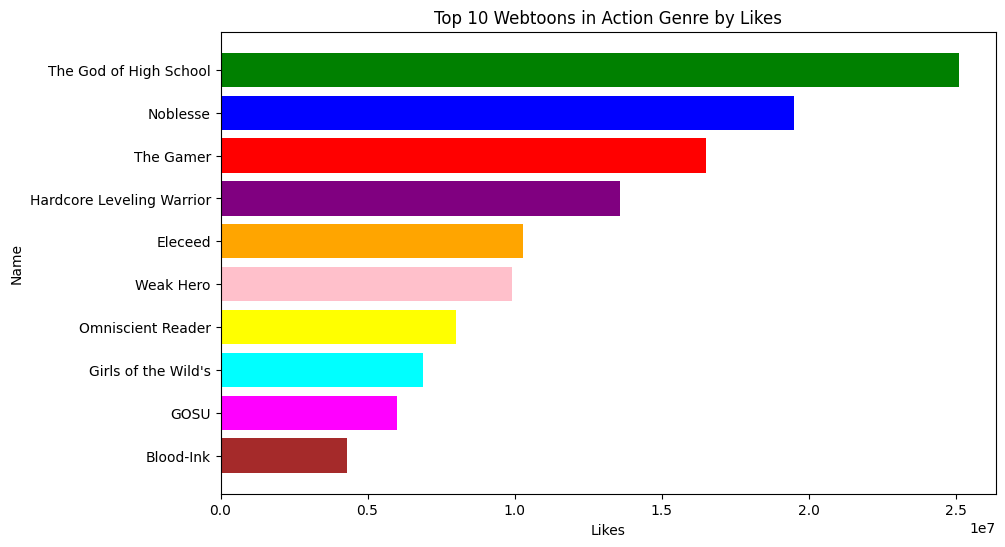

In [5]:
#장르라는 키워드에서 input입력값을 받아 그래프로 시각화하는 코드
genre_input = input("장르를 입력하세요 (예: Romance): ")

df_genre = df[df['Genre'] == genre_input]

# 입력한 값으로 데이터를 필터링 한 후 내림차순으로 정렬
sorted_genre = df_genre.sort_values(by='Likes', ascending=False)
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow', 'cyan', 'magenta', 'brown']
# 내림차순으로 정렬한 데이터중 10개의 데이터만 사용하겠다. == 즉 top10의 데이터만 추출하여 사용하겠다는 뜻
top_10_genre = sorted_genre.head(10)

# 시각화
#그래프의 크기를 설정하는 코드로써 10은 width를 뜻하며, 6은 height를 의미함
plt.figure(figsize=(10, 6))

#barh(수평 막대) type 그래프를 사용하는 코드
plt.barh(top_10_genre['Name'], top_10_genre['Likes'], color=colors[:len(top_10_genre)])
plt.xlabel('Likes')
plt.ylabel('Name')
plt.title(f'Top 10 Webtoons in {genre_input} Genre by Likes')
plt.gca().invert_yaxis()  # 상위 항목이 위에 오도록 설정
plt.show()

# 각 장르별 top1 데이터의 값을 추출하여 그래프(barh)를 시각화하는 코드

<Figure size 1000x600 with 0 Axes>

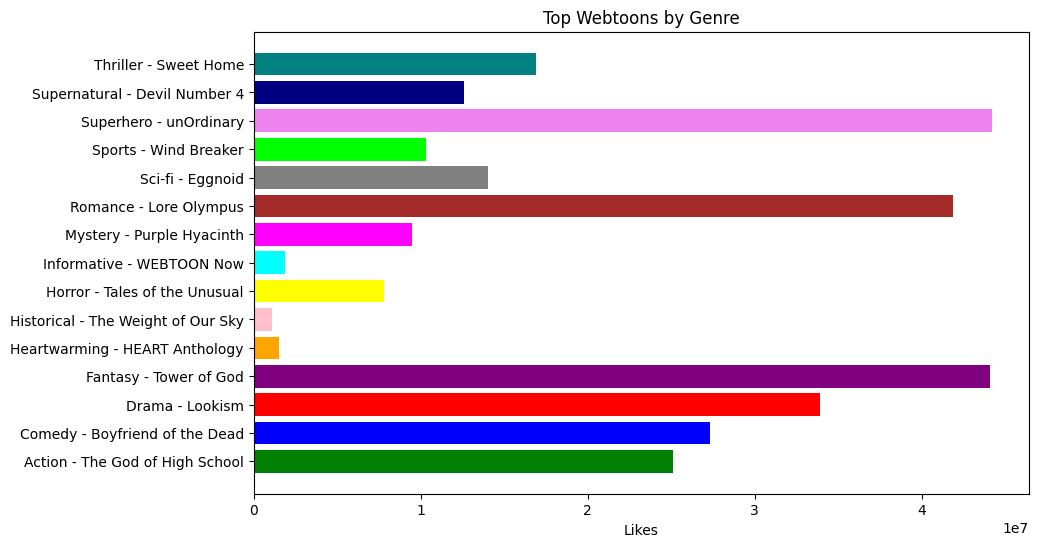

In [ ]:
#장르별로 top1을 추출하여 데이터를 시각화하는 코드
top_genre = df.loc[df.groupby('Genre')['Likes'].idxmax()]

# y축 레이블에 장르 포함
top_genre['Label'] = top_genre['Genre'] + " - " + top_genre['Name']
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow', 'cyan', 'magenta', 'brown', 'grey', 'lime', 'violet', 'navy', 'teal']

# 시각화
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.barh(top_genre['Label'], top_genre['Likes'], color=colors[:len(top_genre)])
plt.xlabel('Likes')
plt.title('Top Webtoons by Genre')
plt.show()

# 각 장르별 top1 데이터의 값을 추출하여 그래프(pie)를 시각화하는 코드

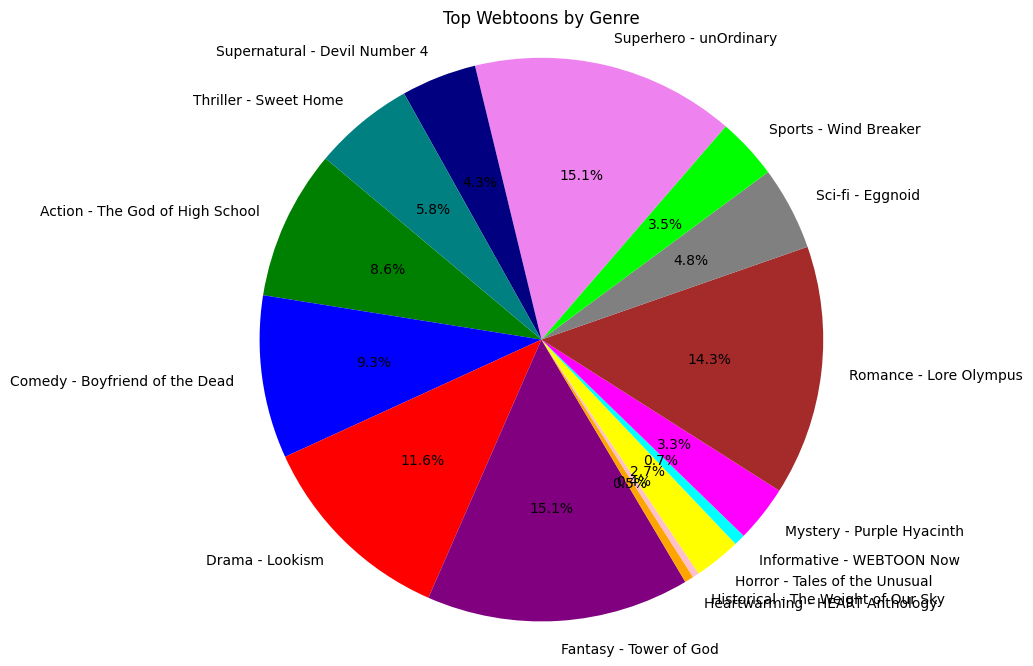

In [ ]:
#장르별로 top1을 추출하여 데이터를 시각화하는 코드인데 원형그래프로 표현
# 장르별 최다 'Likes'를 가진 웹툰 선택
top_genre = df.loc[df.groupby('Genre')['Likes'].idxmax()]

# y축 레이블에 장르 포함
top_genre['Label'] = top_genre['Genre'] + " - " + top_genre['Name']

# 파이 차트 색상 리스트
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow', 'cyan', 'magenta', 'brown',
          'grey', 'lime', 'violet', 'navy', 'teal']

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(top_genre['Likes'], labels=top_genre['Label'], colors=colors[:len(top_genre)], autopct='%1.1f%%', startangle=140)
plt.title('Top Webtoons by Genre')
plt.axis('equal')  # 원형으로 표시하기 위해 축 비율 설정
plt.show()

# 2개의 barh타입의 그래프와 pie타입의 그래프를 활용하여 동시에 보여주는 코드

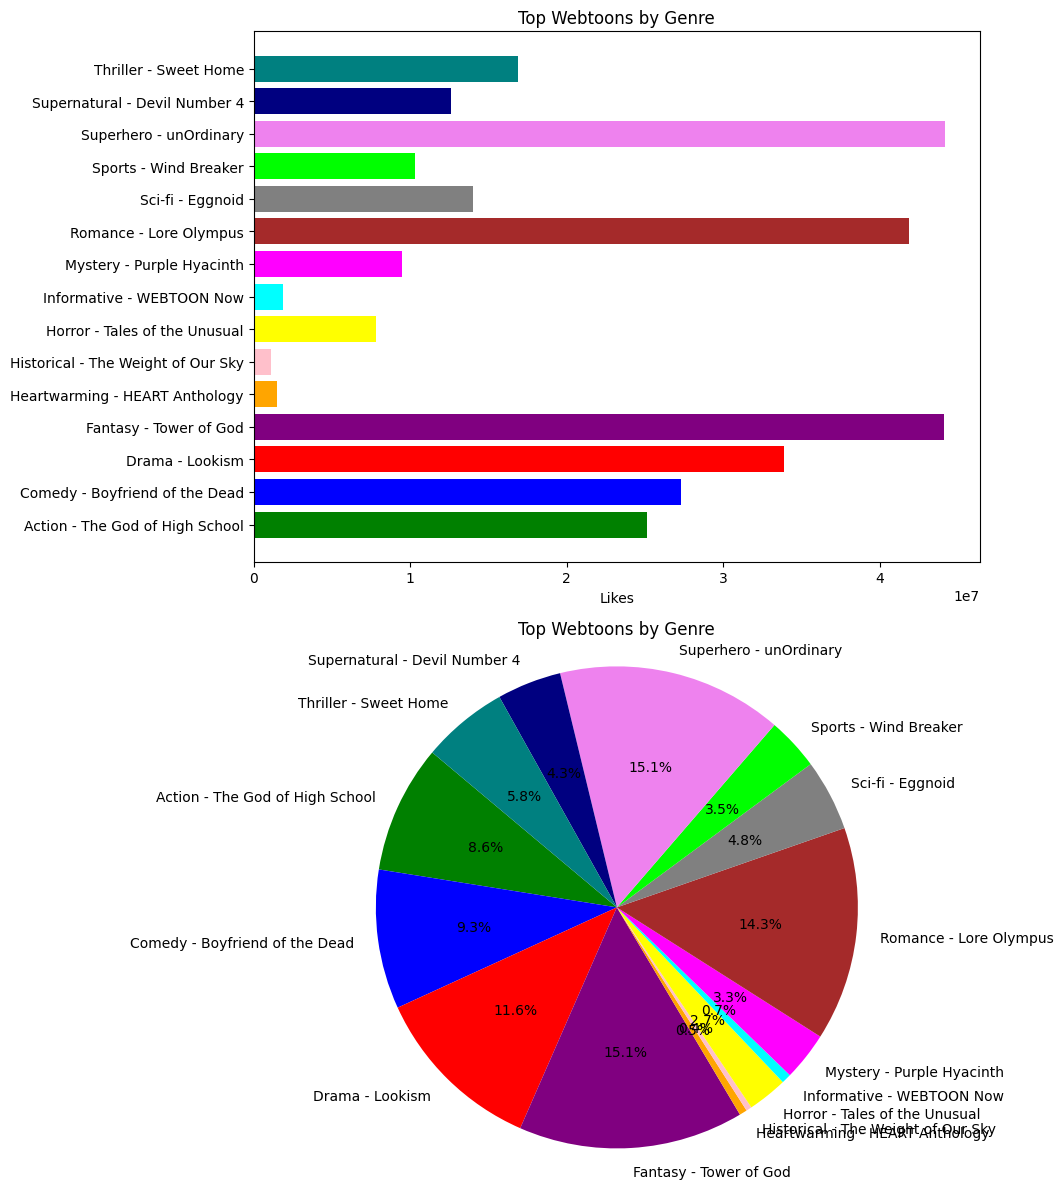

In [ ]:
#장르별로 top1의 데이터를 추출하여 그래프를 동시에 보여주는 코드
# 장르별 최다 'Likes'를 가진 웹툰 선택
top_genre = df.loc[df.groupby('Genre')['Likes'].idxmax()]

# y축 레이블에 장르 포함
top_genre['Label'] = top_genre['Genre'] + " - " + top_genre['Name']

# 색상 리스트
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow', 'cyan',
          'magenta', 'brown', 'grey', 'lime', 'violet', 'navy', 'teal']

# 전체 Figure 크기 설정
plt.figure(figsize=(10, 12))  # 높이를 늘려서 두 개의 그래프가 겹치지 않도록 함

# 1. 막대 그래프
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 서브플롯
plt.barh(top_genre['Label'], top_genre['Likes'], color=colors[:len(top_genre)])
plt.xlabel('Likes')
plt.title('Top Webtoons by Genre')

# 2. 파이 차트
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 서브플롯
plt.pie(top_genre['Likes'], labels=top_genre['Label'], colors=colors[:len(top_genre)],
        autopct='%1.1f%%', startangle=140)
plt.title('Top Webtoons by Genre')
plt.axis('equal')  # 원형으로 표시하기 위해 축 비율 설정

plt.tight_layout()  # 서브플롯 간의 간격 조정
plt.show()